### Import necessary Libraries for Data Analysis

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Install Java

In [0]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.6" 2020-01-14
OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)


### Install Apache Spark and findspark 

In [0]:
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz

In [0]:
!tar xf spark-2.4.5-bin-hadoop2.7.tgz

In [0]:
!pip install -q findspark # Python can easily find Spark with this library


### Setting up Environment & Session

In [0]:
import os
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"
import findspark # adding pyspark to sys.path at runtime
findspark.init()

In [0]:
# Execute Spark in Local Mode
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Assessment_2_Spark") \
    .getOrCreate()

### Reading Data and EDA

In [0]:
from google.colab import files
files.upload()

Saving DMV_CS551G_Assignment 2-dataset-nuclear_plants.csv to DMV_CS551G_Assignment 2-dataset-nuclear_plants.csv


{'DMV_CS551G_Assignment 2-dataset-nuclear_plants.csv': b'\xef\xbb\xbfStatus,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3 ,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4\r\nNormal,4.5044,0.7443,6.34,1.9052,29.5315,0.8647,2.2044,6.048,14.4659,21.648,15.3429,1.2186\r\nNormal,4.4284,0.9073,5.6433,1.6232,27.5032,1.4704,1.9929,5.9856,20.8356,0.0646,14.8813,7.3483\r\nNormal,4.5291,1.0199,6.113,1.0565,26.4271,1.9247,1.942,6.7162,5.3358,11.0779,25.0914,9.2408\r\nNormal,5.1727,1.0007,7.8589,0.2765,25.1576,2.609,2.9234,6.7485,1.9017,1.8463,28.664,4.0157\r\nNormal,5.2258,0.6125,7.9504,0.1547,24.0765,3.2113,4.4563,5.8411,0.5077,9.37,34.8122,13.4966\r\nNormal,4.8834,0.5786,5.6021,0.5942,21.0365,2.6275,4.3996,5.3487,3.6465,9.3793,36.2431,11.124\r\nNormal,5.7422,0.8862,5.1013,0.9402,15.5171,2.92,2.7061,5.0366,9.1854,9.1116,27.3162,2.8526\r\nNormal,6.5076,0.543

In [0]:
# reading data in Spark dataframe
df = spark.read.csv('DMV_CS551G_Assignment 2-dataset-nuclear_plants.csv',inferSchema=True, header=True)

In [0]:
df.columns

['Status',
 'Power_range_sensor_1',
 'Power_range_sensor_2',
 'Power_range_sensor_3 ',
 'Power_range_sensor_4',
 'Pressure _sensor_1',
 'Pressure _sensor_2',
 'Pressure _sensor_3',
 'Pressure _sensor_4',
 'Vibration_sensor_1',
 'Vibration_sensor_2',
 'Vibration_sensor_3',
 'Vibration_sensor_4']

In [0]:
data = df.drop('Status')

In [0]:
data.count(), len(data.columns)

(996, 12)

In [0]:
data.show(5)

+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|              4.5044|              0.7443|                 6.34|              1.9052|           29.5315|            0.8647|            2.2044|             6.048|           14.4659|            21.648|           15.3429|            1.2186|
|              4.4284|              0.9073| 

In [0]:
data.printSchema()

root
 |-- Power_range_sensor_1: double (nullable = true)
 |-- Power_range_sensor_2: double (nullable = true)
 |-- Power_range_sensor_3 : double (nullable = true)
 |-- Power_range_sensor_4: double (nullable = true)
 |-- Pressure _sensor_1: double (nullable = true)
 |-- Pressure _sensor_2: double (nullable = true)
 |-- Pressure _sensor_3: double (nullable = true)
 |-- Pressure _sensor_4: double (nullable = true)
 |-- Vibration_sensor_1: double (nullable = true)
 |-- Vibration_sensor_2: double (nullable = true)
 |-- Vibration_sensor_3: double (nullable = true)
 |-- Vibration_sensor_4: double (nullable = true)



In [0]:
data.summary().show() # Statistics of data

+-------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+-------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|                 996|                 996|                  996|                 996|               996|               996|               996|               996|               996|               996|               996|               996|
|   mean|  4

In [0]:
# checking missing values
from pyspark.sql.functions import isnull, when, count

df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|     0|                   0|                   0|                    0|                   0|                 0|                 0|                 0|                 0|                 0|                 0|                 0|                 0|
+------+--------

Alternatively we can convert the data to pandas dataframe and view the statistics:

In [0]:
data_pandas = data.toPandas()

In [0]:
data_pandas.isnull().sum() # checking for missing values

Power_range_sensor_1     0
Power_range_sensor_2     0
Power_range_sensor_3     0
Power_range_sensor_4     0
Pressure _sensor_1       0
Pressure _sensor_2       0
Pressure _sensor_3       0
Pressure _sensor_4       0
Vibration_sensor_1       0
Vibration_sensor_2       0
Vibration_sensor_3       0
Vibration_sensor_4       0
dtype: int64

In [0]:
def new_describe(data):
  df = data.describe()
  df.loc['range'] = df.loc['max'] - df.loc['min']
  return df

In [0]:
new_describe(data_pandas)

,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,4.999574,6.379273,9.228112,7.355272,14.199127,3.077958,5.749234,4.997002,8.164563,10.001593,15.187982,9.933591
std,2.764856,2.312569,2.532173,4.354778,11.680045,2.126091,2.526136,4.165490,6.173261,7.336233,12.159625,7.282383
min,0.008200,0.040300,2.583966,0.062300,0.024800,0.008262,0.001224,0.005800,0.000000,0.018500,0.064600,0.009200
25%,2.892120,4.931750,7.511400,3.438141,5.014875,1.415800,4.022800,1.581625,3.190292,4.004200,5.508900,3.842675
50%,4.881100,6.470500,9.348000,7.071550,11.716802,2.672400,5.741357,3.859200,6.752900,8.793050,12.185650,8.853050
75%,6.794557,8.104500,11.046800,10.917400,20.280250,4.502500,7.503578,7.599900,11.253300,14.684055,21.835000,14.357400
max,12.129800,11.928400,15.759900,17.235858,67.979400,10.242738,12.647500,16.555620,36.186438,34.867600,53.238400,43.231400
range,12.121600,11.888100,13.175934,17.173558,67.954600,10.234476,12.646276,16.549820,36.186438,34.849100,53.173800,43.222200


### Data Visualization

In [0]:
df_pandas = df.toPandas()

In [0]:
df_pandas.groupby('Status').size() # checking distribution of classes in the data

Status
Abnormal    498
Normal      498
dtype: int64

In [0]:
df_pandas.groupby('Status').agg(['mean','median','std'])

Power_range_sensor_1           ... Vibration_sensor_4          
                         mean   median  ...             median       std
Status                                  ...                             
Abnormal             4.396695  4.51355  ...            8.13760  6.073996
Normal               5.602453  5.17865  ...            9.48545  8.204229

[2 rows x 36 columns]

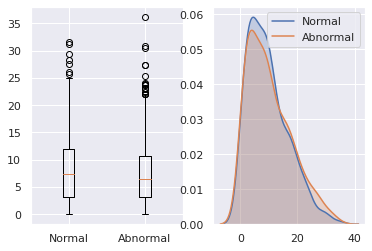

In [0]:
Normal   = df_pandas[df_pandas.Status == "Normal"]
Abnormal = df_pandas[df_pandas.Status == "Abnormal"] 

new_data = [Normal.Vibration_sensor_1, Abnormal.Vibration_sensor_1]

plt.figure()
ax1 = plt.subplot(121)
plt.boxplot(new_data, labels = ["Normal", "Abnormal"])

ax2 = plt.subplot(122)
pt = sns.kdeplot(Normal.Vibration_sensor_2, shade=True, label="Normal")
pt = sns.kdeplot(Abnormal.Vibration_sensor_2, shade=True, label="Abnormal")

plt.show()

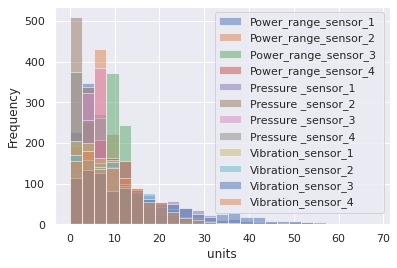

In [0]:
sns.set_context('notebook')

ax = df_pandas.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('units');

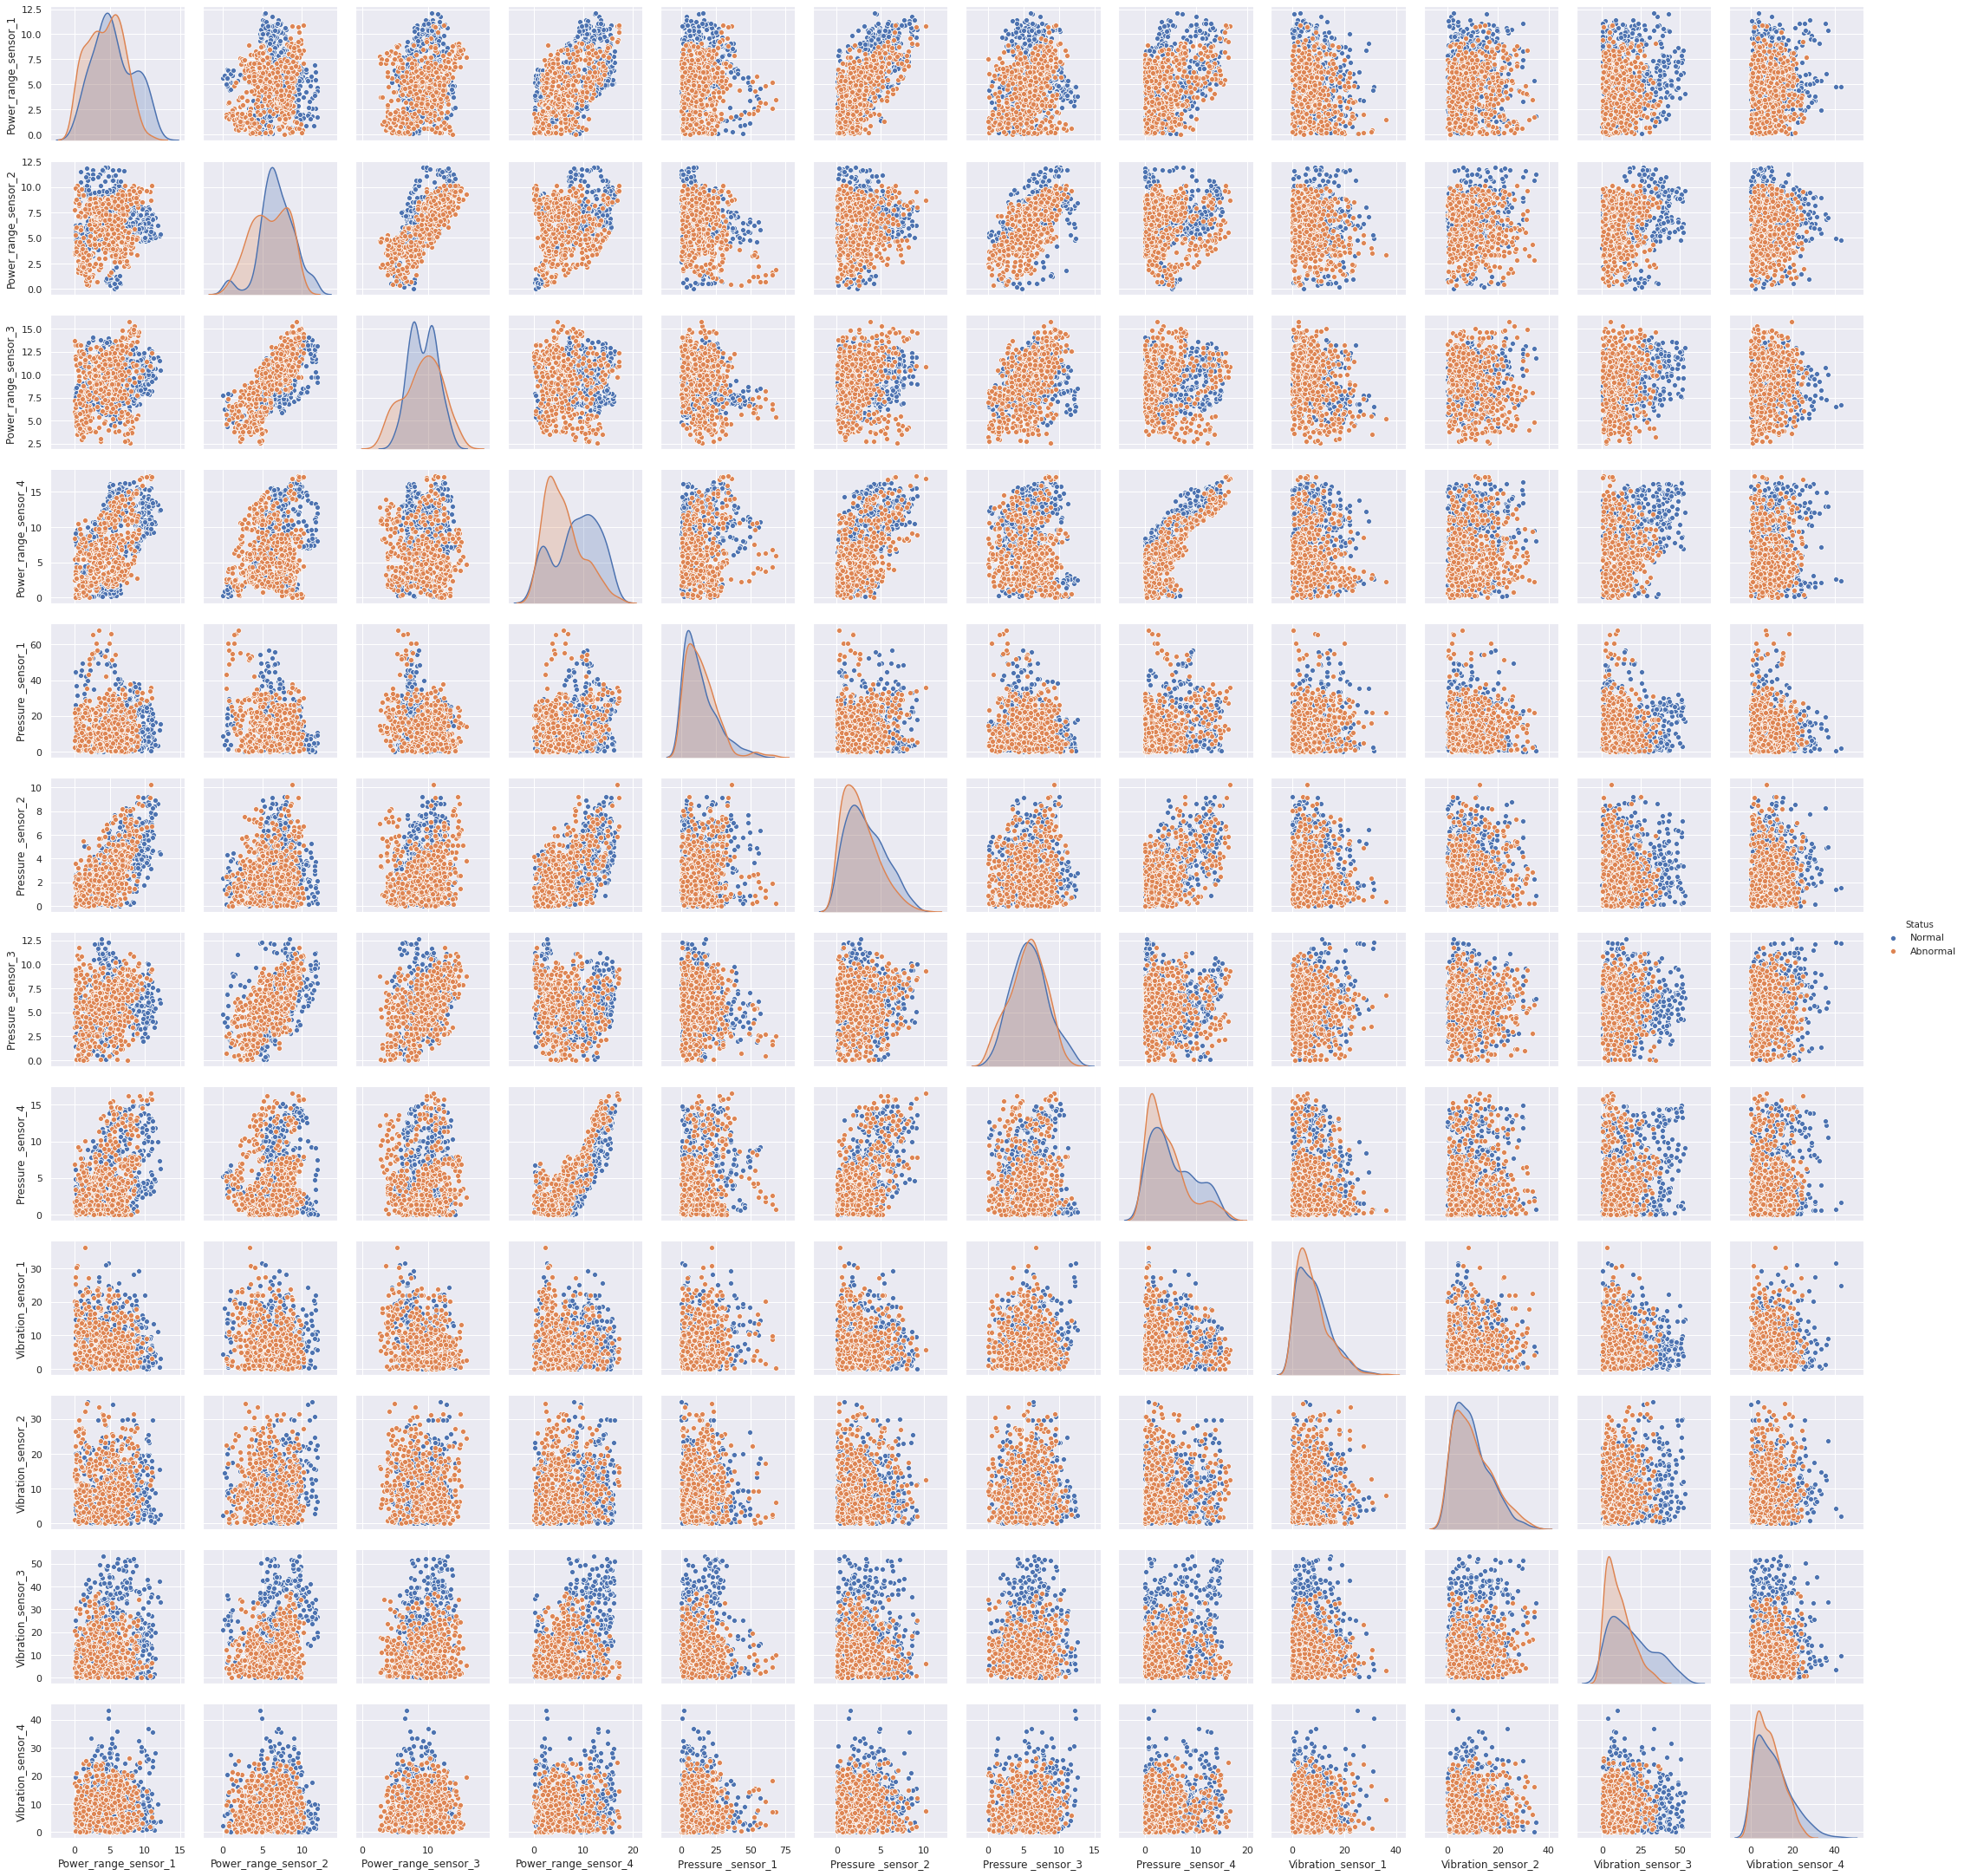

In [0]:
sns.pairplot(df_pandas,hue='Status') # correlations between features

In [0]:
# correlations of features with Target 
y = (df_pandas['Status'] == 'Normal').astype(int)
fields = list(df_pandas.columns[:-1])  
correlations = df_pandas[fields].corrwith(y)
correlations = np.abs(correlations)
correlations.sort_values(inplace=True)
correlations

Power_range_sensor_3     0.025264
Pressure _sensor_1       0.034401
Vibration_sensor_2       0.041183
Vibration_sensor_1       0.044873
Pressure _sensor_3       0.068962
Pressure _sensor_4       0.141514
Pressure _sensor_2       0.158910
Power_range_sensor_2     0.201276
Power_range_sensor_1     0.218160
Power_range_sensor_4     0.309270
Vibration_sensor_3       0.349678
dtype: float64

### Preparing the data

In [0]:
# converting the Categorical Target values to Binary values
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Status", outputCol="Status_Numerical",
                        stringOrderType='alphabetAsc')
indexed = indexer.fit(df).transform(df)


In [0]:
indexed.show(10)

+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|Status_Numerical|
+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------------+
|Normal|              4.5044|              0.7443|                 6.34|              1.9052|           29.5315|            0.8647|            2.2044|             6.048|           14.4659|            21.648|    

In [0]:
# Using feature transformer to merge multiple columns into a vector column
from pyspark.ml.feature import VectorAssembler
inputcols = ["Power_range_sensor_1", "Power_range_sensor_2", "Power_range_sensor_3 ", "Power_range_sensor_4", 
             "Pressure _sensor_1", "Pressure _sensor_2", "Pressure _sensor_3", "Pressure _sensor_4", 
             "Vibration_sensor_1", "Vibration_sensor_2", "Vibration_sensor_3", "Vibration_sensor_4" ]
assembler = VectorAssembler(inputCols= inputcols,
                            outputCol = "predictors")
predictors = assembler.transform(indexed)
predictors.columns

['Status',
 'Power_range_sensor_1',
 'Power_range_sensor_2',
 'Power_range_sensor_3 ',
 'Power_range_sensor_4',
 'Pressure _sensor_1',
 'Pressure _sensor_2',
 'Pressure _sensor_3',
 'Pressure _sensor_4',
 'Vibration_sensor_1',
 'Vibration_sensor_2',
 'Vibration_sensor_3',
 'Vibration_sensor_4',
 'Status_Numerical',
 'predictors']

In [0]:
model_data = predictors.select("predictors", "Status_Numerical")
model_data.show(5,truncate=False)

+----------------------------------------------------------------------------------------+----------------+
|predictors                                                                              |Status_Numerical|
+----------------------------------------------------------------------------------------+----------------+
|[4.5044,0.7443,6.34,1.9052,29.5315,0.8647,2.2044,6.048,14.4659,21.648,15.3429,1.2186]   |1.0             |
|[4.4284,0.9073,5.6433,1.6232,27.5032,1.4704,1.9929,5.9856,20.8356,0.0646,14.8813,7.3483]|1.0             |
|[4.5291,1.0199,6.113,1.0565,26.4271,1.9247,1.942,6.7162,5.3358,11.0779,25.0914,9.2408]  |1.0             |
|[5.1727,1.0007,7.8589,0.2765,25.1576,2.609,2.9234,6.7485,1.9017,1.8463,28.664,4.0157]   |1.0             |
|[5.2258,0.6125,7.9504,0.1547,24.0765,3.2113,4.4563,5.8411,0.5077,9.37,34.8122,13.4966]  |1.0             |
+----------------------------------------------------------------------------------------+----------------+
only showing top 5 rows



In [0]:
train_data,test_data = model_data.randomSplit([0.75,0.25]) # splitting the Train and Test Data

In [0]:
train_data.show(10)

+--------------------+----------------+
|          predictors|Status_Numerical|
+--------------------+----------------+
|[0.0082,7.7728,13...|             0.0|
|[0.0394,3.4424,7....|             0.0|
|[0.0851,5.8301,7....|             1.0|
|[0.0861,4.8303,6....|             1.0|
|[0.108324,3.49911...|             0.0|
|[0.111078,4.11916...|             0.0|
|[0.1117,6.2585,6....|             1.0|
|[0.1273,8.4933,11...|             0.0|
|[0.1273,8.5876,13...|             0.0|
|[0.1447,5.5261,7....|             1.0|
+--------------------+----------------+
only showing top 10 rows



In [0]:
train_data.groupBy('Status_Numerical').count().show() # both classes are almost equally distributed in the training data split

+----------------+-----+
|Status_Numerical|count|
+----------------+-----+
|             0.0|  366|
|             1.0|  378|
+----------------+-----+



In [0]:
test_data.groupBy('Status_Numerical').count().show() # both classes are almost equally distributed in the test data split

+----------------+-----+
|Status_Numerical|count|
+----------------+-----+
|             0.0|  132|
|             1.0|  120|
+----------------+-----+



### Binary Logistic Regression model 

In [0]:
# Build the model, fit the data and make predictions
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'predictors', labelCol = 'Status_Numerical')
lrModel = lr.fit(train_data)
pred = lrModel.evaluate(test_data)

In [0]:
lrModel.coefficients

DenseVector([0.172, 0.3255, -0.2435, 0.2449, -0.0075, 0.0098, -0.0409, -0.1988, 0.037, -0.025, 0.0607, 0.062])

In [0]:
print('Accuracy: ', lrModel.summary.accuracy)
lrModel.summary.areaUnderROC

Accuracy:  0.7271505376344086


0.8119813802873915

In [0]:
pred.predictions.show(20)

+--------------------+----------------+--------------------+--------------------+----------+
|          predictors|Status_Numerical|       rawPrediction|         probability|prediction|
+--------------------+----------------+--------------------+--------------------+----------+
|[0.03825,3.606516...|             0.0|[1.84334532963711...|[0.86334387348634...|       0.0|
|[0.1382,4.9429,8....|             1.0|[1.21193631893552...|[0.77064137904255...|       0.0|
|[0.139128,5.30604...|             0.0|[0.81067899561769...|[0.69225417527543...|       0.0|
|[0.162486,5.97658...|             0.0|[1.97749051038836...|[0.87841339474867...|       0.0|
|[0.218484,6.05594...|             0.0|[2.34773652559143...|[0.91275414632472...|       0.0|
|[0.2325,4.9466,6....|             1.0|[0.62027966304230...|[0.65028215089422...|       0.0|
|[0.23715,3.793278...|             0.0|[1.56673384469815...|[0.82731749340056...|       0.0|
|[0.3983,5.5316,5....|             1.0|[0.43499018237319...|[0.6070646

In [0]:
# Using Binary Classification Evaluator we can get AUCROC and AUCPR from pyspark.ml.evaluation
from pyspark.ml.evaluation import BinaryClassificationEvaluator
eval = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='Status_Numerical', metricName='areaUnderROC')

In [0]:
eval.evaluate(pred.predictions)

0.7196969696969695

In [0]:
eval.evaluate(pred.predictions, {eval.metricName: "areaUnderPR"})

0.6854256854256855

Alternatively, we can use Scikit Learn Metrics:

In [0]:
pred = pred.predictions.toPandas()

In [0]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score,roc_curve,precision_recall_curve

In [0]:
print('Accuracy: ',accuracy_score(pred['prediction'],pred['Status_Numerical']))
print('Precision: ',precision_score(pred['prediction'],pred['Status_Numerical']))
print('Recall: ',recall_score(pred['prediction'],pred['Status_Numerical']))
print('F1 Score: ',f1_score(pred['prediction'],pred['Status_Numerical']))
print('AUCROC Score: ',roc_auc_score(pred['prediction'],pred['Status_Numerical']))

Accuracy:  0.7222222222222222
Precision:  0.6666666666666666
Recall:  0.7272727272727273
F1 Score:  0.6956521739130435
AUCROC Score:  0.7227912932138283


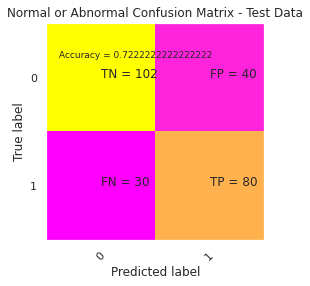

In [0]:
sns.set_style('dark')
cm = confusion_matrix(pred['prediction'],pred['Status_Numerical'])
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.spring)
classNames = ['0','1'] #Check class names
plt.title('Normal or Abnormal Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.annotate(' Accuracy = {}'.format(accuracy_score(pred['prediction'],pred['Status_Numerical'])), size=9,
             xy=(xmin,ymax), xytext=(10, -35), textcoords='offset points')
plt.show()

In [0]:
# Gathering the probabilities of the Positive Class i.e. Normal
prob =[]
for item in pred['probability']:
  prob.append(item[1])

In [0]:
# Calculate the True Positive rate and False Positive rate
base_fpr, base_tpr, _ = roc_curve(pred['Status_Numerical'], [1 for _ in range(len(pred['Status_Numerical']))])
model_fpr, model_tpr, _ = roc_curve(pred['Status_Numerical'], prob)
precision, recall, _ = precision_recall_curve(pred['Status_Numerical'], prob)

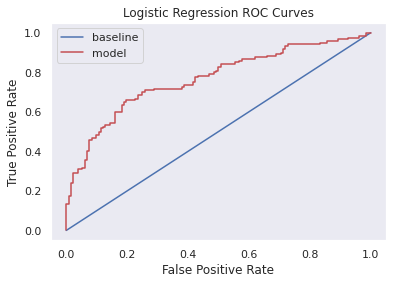

In [0]:
# Plot ROC Curve
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(model_fpr, model_tpr, 'r', label = 'model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curves')
plt.legend()
plt.show()

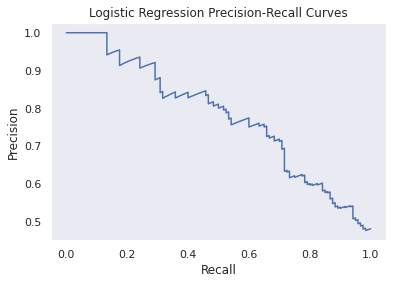

In [0]:
# Plot the precision-recall curve
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curves')
plt.show()

### Gradient Boosted Tree Classifier Model

In [0]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(featuresCol = 'predictors',labelCol = 'Status_Numerical', seed=42,)
gbtModel = gbt.fit(train_data)
gbtpred = gbtModel.transform(test_data)

In [0]:
gbtpred.show(20)

+--------------------+----------------+--------------------+--------------------+----------+
|          predictors|Status_Numerical|       rawPrediction|         probability|prediction|
+--------------------+----------------+--------------------+--------------------+----------+
|[0.03825,3.606516...|             0.0|[1.31599484987925...|[0.93289222056454...|       0.0|
|[0.1382,4.9429,8....|             1.0|[0.72479358854733...|[0.80993489200788...|       0.0|
|[0.139128,5.30604...|             0.0|[0.99196098968325...|[0.87909862682829...|       0.0|
|[0.162486,5.97658...|             0.0|[0.49296843255204...|[0.72828463051884...|       0.0|
|[0.218484,6.05594...|             0.0|[0.64724465142966...|[0.78490608092825...|       0.0|
|[0.2325,4.9466,6....|             1.0|[-1.4221748279530...|[0.05497412667163...|       1.0|
|[0.23715,3.793278...|             0.0|[1.12861990899388...|[0.90527320004205...|       0.0|
|[0.3983,5.5316,5....|             1.0|[0.28871728435636...|[0.6404768

In [0]:
eval.evaluate(gbtpred)

0.8242424242424242

In [0]:
eval.evaluate(gbtpred, {eval.metricName: "areaUnderPR"})

0.7924466338259442

Alternatively, we can use Scikit Learn Metrics:

In [0]:
gbtpred = gbtpred.toPandas()

In [0]:
print('Accuracy: ',accuracy_score(gbtpred['prediction'],gbtpred['Status_Numerical']))
print('Precision: ',precision_score(gbtpred['prediction'],gbtpred['Status_Numerical']))
print('Recall: ',recall_score(gbtpred['prediction'],gbtpred['Status_Numerical']))
print('F1 Score: ',f1_score(gbtpred['prediction'],gbtpred['Status_Numerical']))
print('AUCROC Score: ',roc_auc_score(gbtpred['prediction'],gbtpred['Status_Numerical']))

Accuracy:  0.8253968253968254
Precision:  0.8
Recall:  0.8275862068965517
F1 Score:  0.8135593220338982
AUCROC Score:  0.8255578093306286


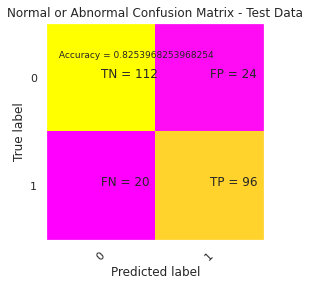

In [0]:
sns.set_style('dark')
cm = confusion_matrix(gbtpred['prediction'],gbtpred['Status_Numerical'])
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.spring)
classNames = ['0','1'] #Check class names
plt.title('Normal or Abnormal Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.annotate(' Accuracy = {}'.format(accuracy_score(gbtpred['prediction'],gbtpred['Status_Numerical'])), size=9,
             xy=(xmin,ymax), xytext=(10, -35), textcoords='offset points')
plt.show()

In [0]:
# Gathering the probabilities of the Positive Class i.e. Normal
prob =[]
for item in gbtpred['probability']:
  prob.append(item[1])

In [0]:
# Calculate the True Positive rate and False Positive rate
base_fpr, base_tpr, _ = roc_curve(gbtpred['Status_Numerical'], [1 for _ in range(len(gbtpred['Status_Numerical']))])
model_fpr, model_tpr, _ = roc_curve(gbtpred['Status_Numerical'], prob)
precision, recall, _ = precision_recall_curve(gbtpred['Status_Numerical'], prob)

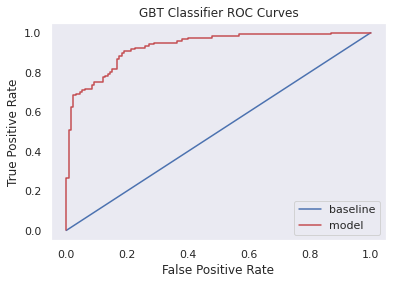

In [0]:
# Plot ROC Curve
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(model_fpr, model_tpr, 'r', label = 'model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GBT Classifier ROC Curves')
plt.legend()
plt.show()

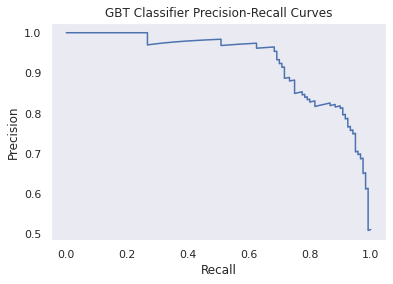

In [0]:
# Plot the precision-recall curve
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('GBT Classifier Precision-Recall Curves')
plt.show()